In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read the data from csv files
df_red = pd.read_csv("winequality-red.csv", delimiter=';')
df_white = pd.read_csv("winequality-white.csv", delimiter=';')

#remove any possible missing values
df_red.dropna
df_white.dropna

In [ ]:
# look at statistical description of red wine dataset 
df_red.describe()

## Quality distribution analysis

Text(5.692382739212007, 643.545, 'Mean: 5.64')

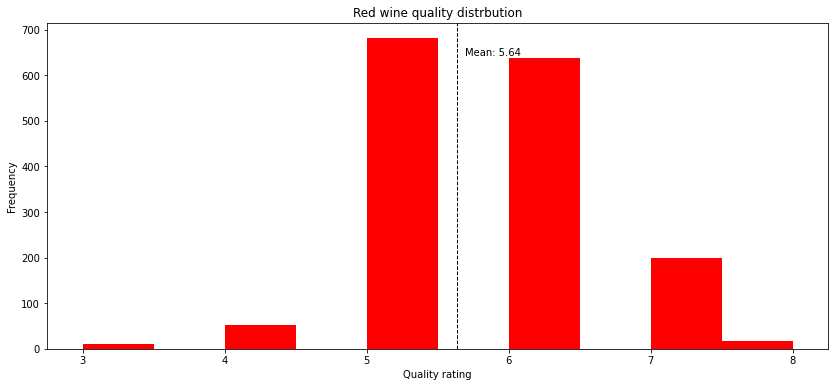

In [ ]:
#1A plotting red wine quality distribution 
ax = df_red['quality'].plot(kind='hist', figsize=(14,6), color="red")
ax.set_xlabel("Quality rating")
ax.set_title("Red wine quality distrbution")
# adding mean line 
plt.axvline(df_red['quality'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df_red['quality'].mean()*1.01, max_ylim*0.9, 'Mean: {:.2f}'.format(df_red['quality'].mean()))

Text(0.5, 0, 'Quality rating')

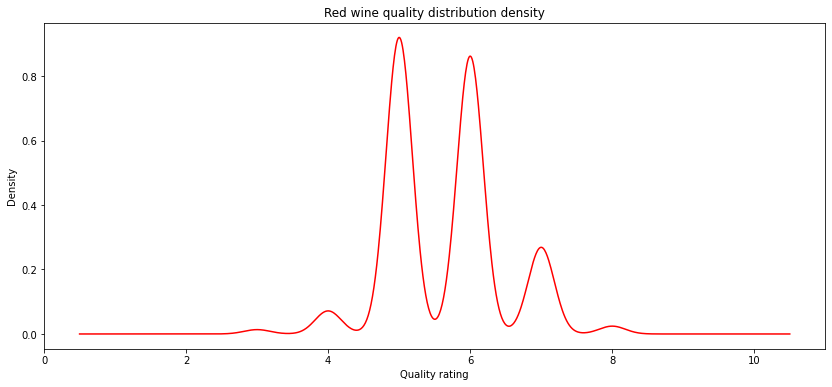

In [ ]:
# ploting the density of red wine quality distribution
ax = df_red['quality'].plot(kind='density', figsize=(14,6), color="red")
ax.set_title("Red wine quality distribution density")
ax.set_xlabel("Quality rating")

Text(5.29011841567987, 2077.11, 'Mean: 5.88')

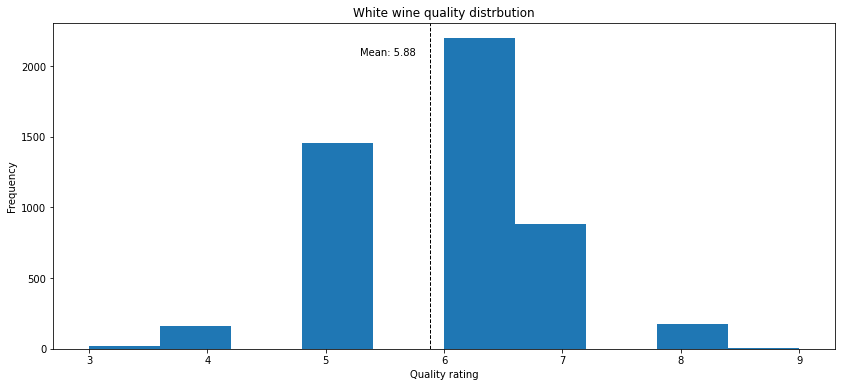

In [ ]:
# plotting white wine quality distribution 
ax1 = df_white['quality'].plot(kind='hist', figsize=(14,6))
ax1.set_xlabel("Quality rating")
ax1.set_title("White wine quality distrbution")

# adding mean line 
plt.axvline(df_white['quality'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df_white['quality'].mean()*0.9, max_ylim*0.9, 'Mean: {:.2f}'.format(df_white['quality'].mean()))

Text(0.5, 0, 'Quality rating')

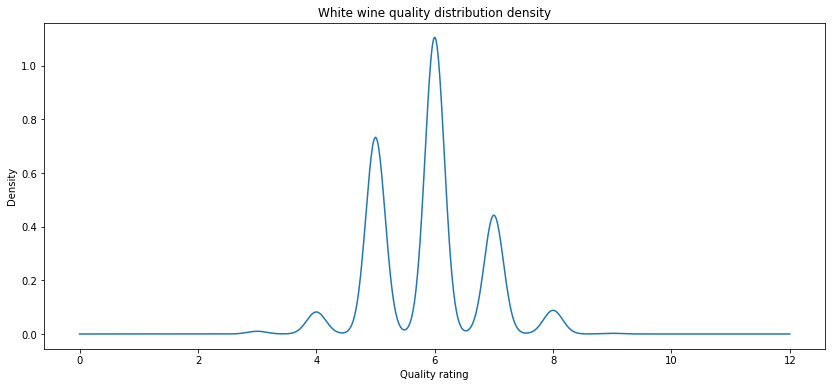

In [ ]:
# ploting the density of white wine quality distribution
ax = df_white['quality'].plot(kind='density', figsize=(14,6))
ax.set_title("White wine quality distribution density")
ax.set_xlabel("Quality rating")

## Alcohol distribution analysis 

In [ ]:
#1B for reds
# discretising alcohol variable 
df_red['alcohol_cat'] = 0
stddev = np.std(df_red['alcohol'])
average = np.average(df_red['alcohol'])
df_red.loc[df_red['alcohol'] < average - stddev, 'alcohol_cat'] = 'L'
df_red.loc[(df_red['alcohol'] > average - stddev) & (df_red['alcohol'] < average + stddev), 'alcohol_cat'] = 'M'
df_red.loc[df_red['alcohol'] > average + stddev, 'alcohol_cat'] = 'H'
#  what percentage of the dataset is in M category
perc =(df_red['alcohol_cat'].value_counts()*100)/len(df_red['alcohol_cat'])
print(perc)

M    70.356473
H    17.510944
L    12.132583
Name: alcohol_cat, dtype: float64


In [ ]:
#1B for whites
# discretising alcohol variable 
df_white['alcohol_cat'] = 0
stddev = np.std(df_white['alcohol'])
average = np.average(df_white['alcohol'])
df_white.loc[df_white['alcohol'] < average - stddev, 'alcohol_cat'] = 'L'
df_white.loc[(df_white['alcohol'] > average - stddev) & (df_white['alcohol'] < average + stddev), 'alcohol_cat'] = 'M'
df_white.loc[df_white['alcohol'] > average + stddev, 'alcohol_cat'] = 'H'
#  what percentage of the dataset is in M category
perc =(df_white['alcohol_cat'].value_counts()*100)/len(df_white['alcohol_cat'])
print(perc)

M    63.719886
H    19.028175
L    17.251940
Name: alcohol_cat, dtype: float64


## Quality depending on alcohol levels

Text(0.5, 0.98, 'Red wine quality distribution regarding alcohol_cat')

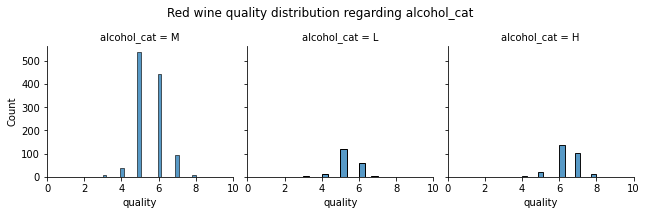

In [ ]:
#1C for reds
# plotting red wine quality distribution based on alcohol levels
grid = sns.FacetGrid(df_red, col="alcohol_cat")
grid.map(sns.histplot, "quality")
grid.set(xlim=(0,10))
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle('Red wine quality distribution regarding alcohol_cat')

Text(0.5, 0.98, 'White wine quality distribution regarding alcohol_cat')

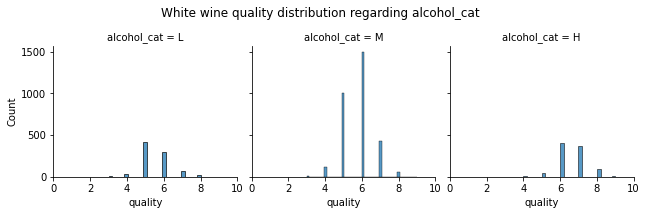

In [ ]:
#1C for whites
# plotting white wine quality distribution based on alcohol levels
grid = sns.FacetGrid(df_white, col="alcohol_cat")
grid.map(sns.histplot, "quality")
grid.set(xlim=(0,10))
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle('White wine quality distribution regarding alcohol_cat')

## Sweetness analysis

In [ ]:
#1D for reds
# after applying desribe() function on red wine dataset, I took the 50% value
# which was 2.2 - this value divides the data sample almost equally. 
# However, it has more 'dry' wines, as it's said in the task description.
# Dry - 0, Sweet - 1
df_red['isSweet'] = 0
df_red.loc[df_red['residual sugar'] > 2.2, 'isSweet'] = 1
df_red['residual sugar'].median()

2.2

In [ ]:
#1D for whites
# after applying desribe() function on white wine dataset, I took the 50% value
# which was 5.2 - this value divides the data sample almost equally. 
# However, it has more 'dry' wines, as it's said in the task description.
# Dry - 0, Sweet - 1
df_white['isSweet'] = 0
df_white.loc[df_white['residual sugar'] > 5.2, 'isSweet'] = 1
df_white['residual sugar'].median()

5.2

## Sweetness impact on quality

Text(0.5, 0.98, 'Red wine quality distribution regarding isSweet')

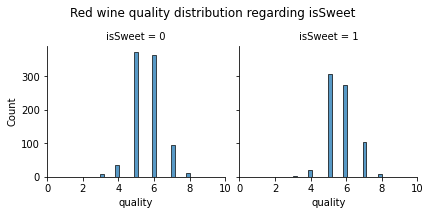

In [ ]:
#1E for reds
# plotting red wine quality distribution based on wine's sweetness
grid = sns.FacetGrid(df_red, col="isSweet")
grid.map(sns.histplot, "quality")
grid.set(xlim=(0,10))
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle('Red wine quality distribution regarding isSweet')

Text(0.5, 0.98, 'White wine quality distribution regarding isSweet')

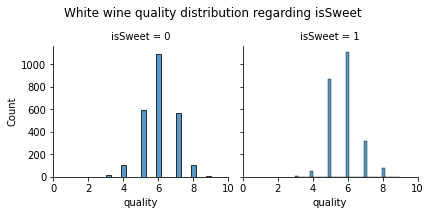

In [ ]:
#1E for whites
# plotting white wine quality distribution based on wine's sweetness
grid = sns.FacetGrid(df_white, col="isSweet")
grid.map(sns.histplot, "quality")
grid.set(xlim=(0,10))
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle('White wine quality distribution regarding isSweet')

Text(0.5, 0.98, "Red wine's quality score based on isSweet variable")

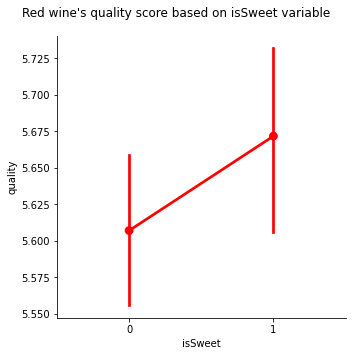

In [ ]:
# trying different plotting method
ax = sns.catplot(x='isSweet', y='quality',kind='point', data = df_red, color='red')
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Red wine's quality score based on isSweet variable")

Text(0.5, 0.98, "White wine's quality score based on isSweet variable")

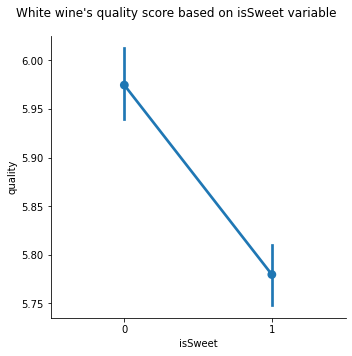

In [ ]:
# trying different plotting method
ax = sns.catplot(x='isSweet', y='quality',kind='point', data = df_white)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("White wine's quality score based on isSweet variable")

## Heatmaps 

Text(0.5, 1.0, 'Red wine correlation heatmap')

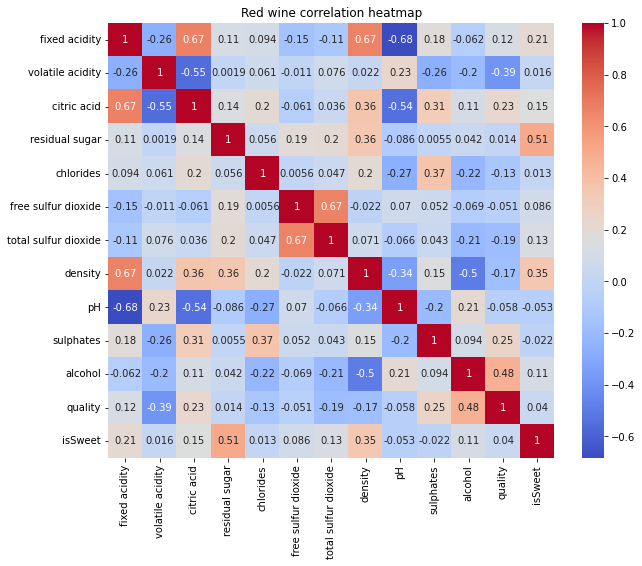

In [ ]:
#2 for reds
# plotting the correlation heatmap for red wine 
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_red.corr(method="spearman"), annot=True, cmap="coolwarm")
ax.set_title("Red wine correlation heatmap")

In [ ]:
# using this for choosing heatmap method; I wanted to see if the relationships
# between varibales are linear 
# takes a long time to compile 
sns.pairplot(df_red, kind='scatter')

In [ ]:
#2 for whites
# plotting the correlation heatmap for white wine 
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_white.corr(method="spearman"), annot=True, cmap="coolwarm")
ax.set_title("White wine correlation heatmap")

### ***RED WINES***

## Classification algorithms

In [ ]:
# finding a good treshold for binary classification
df_red['goodquality'] = [1 if x >=7 else 0 for x in df_red['quality']]
df_red['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [ ]:
df_red['goodquality'] = [1 if x >=5 else 0 for x in df_red['quality']]
df_red['goodquality'].value_counts()

1    1536
0      63
Name: goodquality, dtype: int64

In [ ]:
df_red['goodquality'] = [1 if x >=6 else 0 for x in df_red['quality']]
df_red['goodquality'].value_counts()

1    855
0    744
Name: goodquality, dtype: int64

###Logistic regression with PCA, testing with roc curves

In [ ]:
# sepparate feature and target var
x=df_red.drop(['quality', 'goodquality','alcohol_cat', 'isSweet'], axis=1)
y=df_red['goodquality']
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
# applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PC = pca.fit_transform(x)
principalDF= pd.DataFrame(data=PC,columns=['pc1','pc2'])
finalDF = pd.concat([principalDF, df_red[['goodquality']]], axis = 1)
finalDF

In [ ]:
# manipulating the data to see what variables are selcetd as pricipal components
PCloadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components=df_red.columns.tolist()
components.remove('goodquality')
components.remove('quality')
components.remove('alcohol_cat')
components.remove('isSweet')
loadingdf = pd.DataFrame(PCloadings,columns=('PC1', 'PC2'))
components
loadingdf["variable"]=components
loadingdf

In [ ]:
# plotting components and target variable 
import plotly.express as ex
fig=ex.scatter(x=loadingdf['PC1'],y=loadingdf['PC2'],text=loadingdf['variable'],)
fig.update_layout(
height=600,width=500,
title_text='loadings plot')
fig.update_traces(textposition='bottom center')
fig.add_shape(type="line",
x0=-0, y0=-0.5,x1=-0,y1=2.5,
line=dict(color="RoyalBlue",width=3)
)
fig.add_shape(type="line",
x0=-1, y0=0,x1=1,y1=0,
line=dict(color="RoyalBlue",width=3)
)
fig.show()

In [ ]:
# applying Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
Xfinal=finalDF[['pc1','pc2']]
yfinal=finalDF['goodquality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal,yfinal,test_size=0.2)
logistic=LogisticRegression()
logistic.fit(X=X_train,y=y_train)
logistic.predict(X_test)
score_2_test=logistic.score(X_test,y_test)
print("Logistic regression with 2 principal components accuracy with test:") 
print(score_2_test)
logistic.predict(X_train)
score_2_train=logistic.score(X_train,y_train)
print("Logistic regression with 2 principal components accuracy with train:") 
print(score_2_train)

Logistic regression with 2 principal components accuracy with test:
0.65625
Logistic regression with 2 principal components accuracy with train:
0.6458170445660673


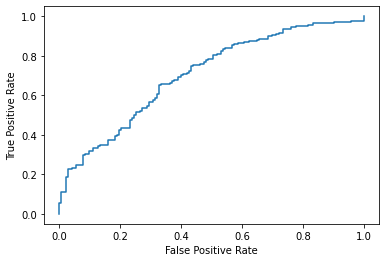

0.703923195448619


In [ ]:
# testing Logistic Regression
from sklearn import metrics
#define metrics
y_pred_proba = logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(auc)

Logistic regression with 3 principal components accuracy with test:
0.703125
Logistic regression with 3 principal components accuracy with train:
0.7294761532447225


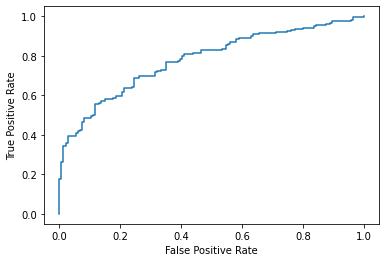

0.7796016375373958


In [ ]:
# Trying Logistic regression with 3 pricipal components to see if the results improve
pca=PCA(n_components=3)
PC=pca.fit_transform(x)
principalDF=pd.DataFrame(data=PC,columns=['pc1','pc2','pc3'])
finalDf = pd.concat([principalDF, df_red[['goodquality']]], axis = 1)
Xfinal=finalDf[['pc1','pc2','pc3']]
yfinal=finalDf['goodquality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal,yfinal,test_size=0.2)
logistic=LogisticRegression()
logistic.fit(X=X_train,y=y_train)
logistic.predict(X_test)
score_3_test=logistic.score(X_test,y_test)
print("Logistic regression with 3 principal components accuracy with test:") 
print(score_3_test)
logistic.predict(X_train)
score_3_train=logistic.score(X_train,y_train)
print("Logistic regression with 3 principal components accuracy with train:") 
print(score_3_train)

y_pred_proba = logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(auc)

Logistic regression with 4 principal components accuracy with test:
0.73125
roc auc score on test split
0.7946936692962832


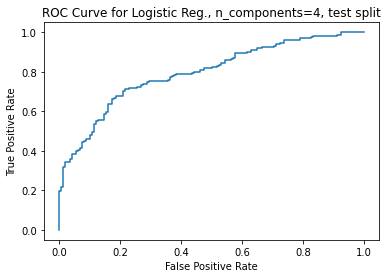

Logistic regression with 4 principal components accuracy with train:
0.7232212666145426


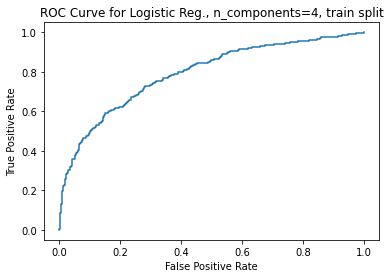

roc auc score on train split
0.7911174996314316


In [ ]:
# Trying Logistic regression with 3 pricipal components to see if the results improve
pca=PCA(n_components=4)
PC=pca.fit_transform(x)
principalDF=pd.DataFrame(data=PC,columns=['pc1','pc2','pc3','pc4'])
finalDf = pd.concat([principalDF, df_red[['goodquality']]], axis = 1)
Xfinal=finalDf[['pc1','pc2','pc3','pc4']]
yfinal=finalDf['goodquality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal,yfinal,test_size=0.2)
logistic=LogisticRegression()
logistic.fit(X=X_train,y=y_train)
logistic.predict(X_test)
score_4_test=logistic.score(X_test,y_test)
print("Logistic regression with 4 principal components accuracy with test:") 
print(score_4_test)

# test test split
y_pred_proba_test = logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_test)
auc_test = metrics.roc_auc_score(y_test, y_pred_proba_test)
print("roc auc score on test split")
print(auc_test)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Logistic Reg., n_components=4, test split')
plt.show()

# test train split
logistic.predict(X_train)
score_4_train=logistic.score(X_train,y_train)
print("Logistic regression with 4 principal components accuracy with train:") 
print(score_4_train)

y_pred_proba_train = logistic.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba_train)
auc_train = metrics.roc_auc_score(y_train, y_pred_proba_train)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Logistic Reg., n_components=4, train split')
plt.show()
print("roc auc score on train split")
print(auc_train)

## Decision Tree

In [ ]:
# sepparate feature and target var
X=df_red.drop(['quality', 'goodquality','alcohol_cat', 'isSweet'], axis=1)
y=df_red['goodquality']
from sklearn.preprocessing import StandardScaler
X_features = X
X=StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train,y_train)
y_pred_tree_test = model1.predict(X_test)
print("classification report for decision tree with test split:\n " + classification_report(y_test,y_pred_tree_test))

print("\n")
y_pred_tree_train = model1.predict(X_train)
print("classification report for decision tree with train split:\n " + classification_report(y_train,y_pred_tree_train))




classification report for decision tree with test split:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76       148
           1       0.82      0.72      0.77       172

    accuracy                           0.76       320
   macro avg       0.77      0.77      0.76       320
weighted avg       0.77      0.76      0.76       320

f1 score with test split:
0.765432098765432
accuracy score with test split
0.7625


classification report for decision tree with train split:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00       683

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279

f1 score with train split:
1.0
accuracy score with train split
1.0


# Regression

## Linear Regression

In [ ]:
# Applying linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score
import math
# sepparate feature and target var
X=df_red.drop(['quality','alcohol_cat','goodquality','isSweet'], axis=1)
y=df_red['quality']
X_features = X
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
linear=LinearRegression()
linear.fit(X_train,y_train)
linear_pred = linear.predict(X_test)
MSE = mean_squared_error(y_test, linear_pred)
print("scores with test split: ")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_test, linear_pred)
print(EVS)

linear_pred = linear.predict(X_train)
MSE = mean_squared_error(y_train, linear_pred) 
print("scores with train split: ")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_train, linear_pred)
print(EVS)

scores with test split: 
0.38447119782012423
0.6200574149384267
0.3372683949019456
scores with train split: 
0.4258083784387746
0.6525399439411925
0.36545196162068627


## Support vector regression

In [ ]:
# Applying Support vector regression
from sklearn.svm import SVR
X=df_red.drop(['quality','alcohol_cat','goodquality','isSweet'], axis=1)
y=df_red['quality']
X_features = X
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
svr_pred = regressor.predict(X_test)
MSE = mean_squared_error(y_test, svr_pred) 
print("test split scores:")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_test, svr_pred)
print(EVS)

svr_pred = regressor.predict(X_train)
MSE = mean_squared_error(y_train, svr_pred)
print("train split scores:")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_train, svr_pred)
print(EVS)


test split scores:
0.3738806124732452
0.6114577765252849
0.3513724404791476
train split scores:
0.2979543497651356
0.5458519485768422
0.5565289782270113


In [ ]:
# adding z score method standartization, to see if it improves the models performace
from scipy import stats
df_red_1 = df_red.drop(['alcohol_cat','goodquality','isSweet'], axis=1)
z=np.abs(stats.zscore(df_red_1))
threshold=3
df_red_z=df_red_1[(z< 3)]
#shuffle cause they're in order
df_red_z = df_red_z.sample(frac = 1)
X = df_red_z.drop(['quality'],axis=1)
y= df_red_z['quality']
X_features = X
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
svr_pred = regressor.predict(X_test)
MSE = mean_squared_error(y_test, svr_pred)
print("test split scores:")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_test, svr_pred)
print(EVS)

svr_pred = regressor.predict(X_train)
MSE = mean_squared_error(y_train, svr_pred) 
print("train split scores:")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_train, svr_pred)
print(EVS)

test split scores:
0.2063174746830158
0.4542218342209188
0.6824671467873424
train split scores:
0.20241390627835126
0.44990433013958786
0.687138581380222


 ***WHITE*** ***WINES***
##Classification algorithms

In [ ]:
# finding a good treshold for binary classification
df_white['goodquality'] = [1 if x >=7 else 0 for x in df_white['quality']] 
df_white['goodquality'].value_counts()

0    3838
1    1060
Name: goodquality, dtype: int64

In [ ]:
df_white['goodquality'] = [1 if x >=5 else 0 for x in df_white['quality']] 
df_white['goodquality'].value_counts()

1    4715
0     183
Name: goodquality, dtype: int64

In [ ]:
df_white['goodquality'] = [1 if x >=6 else 0 for x in df_white['quality']] a
df_white['goodquality'].value_counts()

1    3258
0    1640
Name: goodquality, dtype: int64

## Logistic Regression with PCA

In [ ]:
# sepparate feature and target var
x=df_white.drop(['quality', 'goodquality','alcohol_cat','isSweet'], axis=1)
y=df_white['goodquality']
x=StandardScaler().fit_transform(x)

0.6836734693877551
roc auc score on the test split
0.7396760985298667


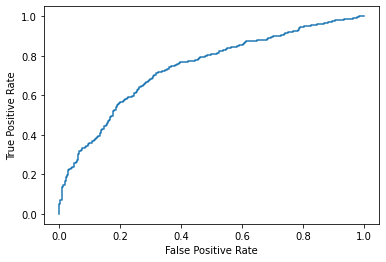

0.7138273045507585
roc auc score on the test split
0.7549331572051796


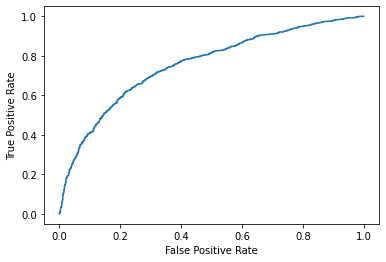

In [ ]:
# applying Logistic regression with 4 pricipal components only, 
# as it showed the best results for red whine dataset
pca=PCA(n_components=4)
PC=pca.fit_transform(x)
principalDF=pd.DataFrame(data=PC,columns=['pc1','pc2','pc3','pc4'])
finalDf = pd.concat([principalDF, df_white[['goodquality']]], axis = 1)
Xfinal=finalDf[['pc1','pc2','pc3','pc4']]
yfinal=finalDf['goodquality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal,yfinal,test_size=0.3)
logistic=LogisticRegression()
logistic.fit(X=X_train,y=y_train)
# test test split
logistic.predict(X_test)
score_4=logistic.score(X_test,y_test)
print(score_4)

y_pred_proba = logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("roc auc score on the test split")
print(auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# test train split
logistic.predict(X_train)
score_4=logistic.score(X_train,y_train)
print(score_4)

y_pred_proba = logistic.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print("roc auc score on the test split")
print(auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Decision Tree

In [ ]:
# sepparate feature and target var
X=df_white.drop(['quality', 'goodquality','alcohol_cat','isSweet'], axis=1)
y=df_white['goodquality']
X_features = X
X=StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train,y_train)
y_pred_tree_test = model1.predict(X_test)
print("classification report for decision tree with test split:\n " + classification_report(y_test,y_pred_tree_test))
print("f1 score with test split:")
print(f1_score(y_test,y_pred_tree_test))
print("accuracy score with test split")
print(accuracy_score(y_test,y_pred_tree_test))
print("\n")
y_pred_tree_train = model1.predict(X_train)
print("classification report for decision tree with train split:\n " + classification_report(y_train,y_pred_tree_train))
print("f1 score with train split:")
print(f1_score(y_train,y_pred_tree_train))
print("accuracy score with train split")
print(accuracy_score(y_train,y_pred_tree_train))


## Regression algorithms

## Linear Regression

In [ ]:
# applying Linear regression
X=df_white.drop(['quality','alcohol_cat','goodquality','isSweet'], axis=1)
y=df_white['quality']
X_features = X
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
linear=LinearRegression()
linear.fit(X_train,y_train)
linear_pred = linear.predict(X_test)
MSE = mean_squared_error(y_test, linear_pred) 
print("scores with test split: ")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_test, linear_pred)
print(EVS)

linear_pred = linear.predict(X_train)
MSE = mean_squared_error(y_train, linear_pred) 
print("scores with train split: ")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_train, linear_pred)
print(EVS)


scores with test split: 
0.6598453517957835
0.8123086554972706
0.2552568967297326
scores with train split: 
0.5403729394828255
0.7351006322149543
0.2879431225091078


0.3372683949019456

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR
X=df_white.drop(['quality','alcohol_cat','goodquality','isSweet'], axis=1)
y=df_white['quality']
X_features = X
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
svr_pred_test = regressor.predict(X_test)
MSE = mean_squared_error(y_test, svr_pred_test)
print("test split scores:")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_test, svr_pred_test)
print(EVS)

svr_pred_train = regressor.predict(X_train)
MSE = mean_squared_error(y_train, svr_pred_train)
print("train split scores:")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_train, svr_pred_train)
print(EVS)


test split scores:
0.547286024352962
0.7397878238744958
0.37930864656344154
train split scores:
0.3805626148596238
0.6168975724215681
0.49965502310844334


In [ ]:
# additional z score method
from scipy import stats
df_white_1 = df_white.drop(['alcohol_cat','goodquality','isSweet'], axis=1)
z=np.abs(stats.zscore(df_white_1))
threshold=3
df_white_z=df_white_1[(z< 3)]
#shuffle cause they're in order
df_white_z = df_white_z.sample(frac = 1)
X = df_white_z.drop(['quality'],axis=1)
y= df_white_z['quality']
X_features = X
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
svr_pred = regressor.predict(X_test)
MSE = mean_squared_error(y_test, svr_pred)
print("test split scores:")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_test, svr_pred)
print(EVS)

svr_pred = regressor.predict(X_train)
MSE = mean_squared_error(y_train, svr_pred)
print("train split scores:")
print(MSE)
RMSE = math.sqrt(MSE)
print(RMSE)
EVS = explained_variance_score(y_train, svr_pred) 
print(EVS)

test split scores:
0.2938310490232593
0.5420618498135239
0.6188411033282103
train split scores:
0.28357670677435753
0.5325192078924079
0.637449120462745


##Extensions

<Figure size 720x432 with 0 Axes>

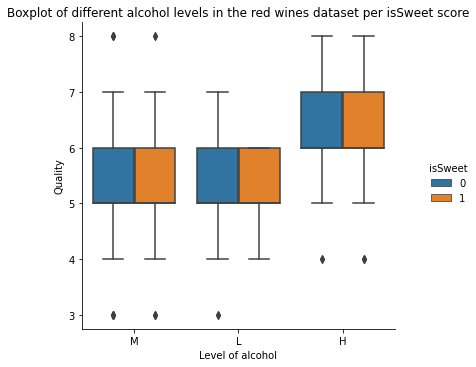

In [ ]:
plt.figure(figsize = (10, 6))
sns.catplot(x = "alcohol_cat", y = "quality", data = df_red, kind = "box", hue = "isSweet")
plt.title("Boxplot of different alcohol levels in the red wines dataset per isSweet score")
plt.xlabel("Level of alcohol")
plt.ylabel("Quality")
plt.show()
plt.close()

<Figure size 720x432 with 0 Axes>

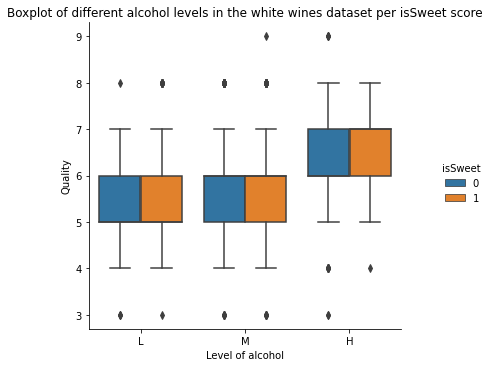

In [ ]:
plt.figure(figsize = (10, 6))
sns.catplot(x = "alcohol_cat", y = "quality", data = df_white, kind = "box", hue = "isSweet")
plt.title("Boxplot of different alcohol levels in the white wines dataset per isSweet score")
plt.xlabel("Level of alcohol")
plt.ylabel("Quality")
plt.show()
plt.close()

<Figure size 720x432 with 0 Axes>

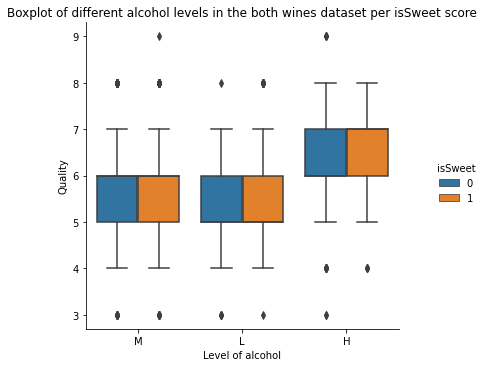

In [ ]:
df_both_wines = pd.concat([df_red, df_white])
plt.figure(figsize = (10, 6))
sns.catplot(x = "alcohol_cat", y = "quality", data = df_both_wines, kind = "box", hue = "isSweet")
plt.title("Boxplot of different alcohol levels in the both wines dataset per isSweet score")
plt.xlabel("Level of alcohol")
plt.ylabel("Quality")
plt.show()
plt.close()